<a href="https://colab.research.google.com/github/Lokuhu/112-2_2LNN/blob/main/%E5%9B%9BD56_HW4_EB_%E8%BD%89_r_EB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
# 試算表>檔案>共用>發布到網路 即可於colab中讀取
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQhbAejyGUXlZltX2nsbC4sTw890L6081piAP8ZDJVbufqZ9xm-S5P7gIrXnpgszm-U9SmEkBxJc5uF/pub?gid=1265524659&single=true&output=csv'
seed = pd.read_csv(url)

In [ ]:
seed['Type'] = seed['Type'].replace(1, 0.0)
seed['Type'] = seed['Type'].replace(2, 1.0)
seed['Type'] = seed['Type'].replace(3, 2.0)
seed

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [ ]:
# Split data
X = seed.drop('Type',axis=1)
y = seed['Type']

# Covert these to numpy arr
X = X.values
y = y.values

# 20%test, 80%training
X_train, X_test, y_train, y_test=train_test_split (X, y ,test_size = 0.2, random_state = 30)

# Covert X and y to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Model5

It was a weight-tuning_EB model.

And the regularization is added.

In [ ]:
#hidden nodes = 11, activation function = Tanh, Optimizer = SGD, learning epochs = 300, learning rate = 0.01, momentum = 0.9
class Model5(nn.Module):

    def __init__(self, in_features = 7, h1 = 11, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.out = nn.Linear(h1, out_features)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Use tanh activation
        x = torch.tanh(self.out(x))  # Use tanh activation

        return x

torch.manual_seed(40)
model5=Model5()
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model5.parameters(),lr=0.01, momentum=0.9)

In [ ]:
model5

Model5(
  (fc1): Linear(in_features=7, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [ ]:
# 權重調整
t = 0
losses = []


In [ ]:
while t < 50:
    y_pred = model5.forward(X_train)

    # 計算交叉熵ㄕㄤ損失
    loss = criterion(y_pred, y_train)


    # regularization
    l2_lambda = 0.001
    p = 7  # 輸入特徵數
    m = 11  # 隱藏層節點數
    regularization_term = (l2_lambda / (p + 1 + p * (m + 1))) * sum(p.pow(2.0).sum() for p in model5.parameters()) # CH8的數學公式

    # 總損失
    total_loss = loss + regularization_term

    # 保留損失
    losses.append(loss.item())

    # 每10個epoch輸出一次loss
    if t % 10 == 0:
        print(f'Epoch: {t} and loss: {loss.item()}')

    # backward and weight adjusted
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    t += 1

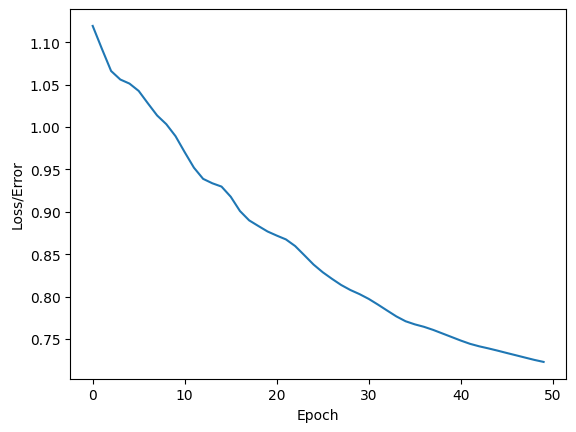

Test Loss: 0.7442947030067444
1. tensor([ 0.4313,  0.4117, -0.7692]) 	 1 	 0
2. tensor([-0.2638, -0.5900,  0.6512]) 	 2 	 2
3. tensor([-0.4551, -0.7488,  0.8533]) 	 2 	 2
4. tensor([ 0.6191,  0.6628, -0.9224]) 	 1 	 1
5. tensor([ 0.5898,  0.6194, -0.9045]) 	 0 	 1
6. tensor([-0.2772, -0.6054,  0.6715]) 	 2 	 2
7. tensor([ 0.0895, -0.1839, -0.0639]) 	 0 	 0
8. tensor([ 0.3832,  0.3104, -0.6950]) 	 0 	 0
9. tensor([-0.4984, -0.7729,  0.8793]) 	 2 	 2
10. tensor([ 0.3712,  0.3850, -0.7185]) 	 1 	 1
11. tensor([ 0.5484,  0.5586, -0.8750]) 	 0 	 1
12. tensor([ 0.5894,  0.6402, -0.9101]) 	 1 	 1
13. tensor([ 0.4322,  0.4256, -0.7745]) 	 1 	 0
14. tensor([ 0.5373,  0.5593, -0.8710]) 	 0 	 1
15. tensor([-0.4477, -0.7447,  0.8481]) 	 2 	 2
16. tensor([ 0.2479,  0.0658, -0.4402]) 	 2 	 0
17. tensor([-0.2126, -0.5389,  0.5699]) 	 2 	 2
18. tensor([-0.4783, -0.7586,  0.8660]) 	 2 	 2
19. tensor([ 0.2993,  0.1711, -0.5525]) 	 0 	 0
20. tensor([-0.4138, -0.7145,  0.8177]) 	 2 	 2
21. tensor([ 0.2469

In [ ]:
plt.plot(range(t), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.show()

# 評估模型
with torch.no_grad():
    y_eval = model5.forward(X_test)
    test_loss = criterion(y_eval, y_test) + (l2_lambda / (p + 1 + p * (m + 1))) * sum(p.pow(2.0).sum() for p in model5.parameters())
    print(f'Test Loss: {test_loss.item()}')

correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model5.forward(data)

        print(f'{i+1}. {y_val} \t {y_test[i]} \t {y_val.argmax().item()}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} correct!')
print(f'The accuracy is {correct/len(y_test)}')